## Client Side  

#### We have a dataset that needed to be analize :
1. Count and seperate what is spam and what is not
2. Visualize it 
3. After Seperate the what is spam and not, make it into category based on massage
4. And visualize it

## Data Scientist  

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### Load the data

In [5]:
email = pd.read_csv('spam.csv')

#### See email dataset detail

In [6]:
email.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
email.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


#### Checking is there any null inside the data

In [7]:
email.isnull().sum()

Category    0
Message     0
dtype: int64

##### There is no null or error inside the data

### Let's start analyzing

In [10]:
count_categories = email['Category'].value_counts()
print(f"The count between spam and ham is:\n{count_categories}")

The count between spam and ham is:
Category
ham     4825
spam     747
Name: count, dtype: int64


#### Visualization 

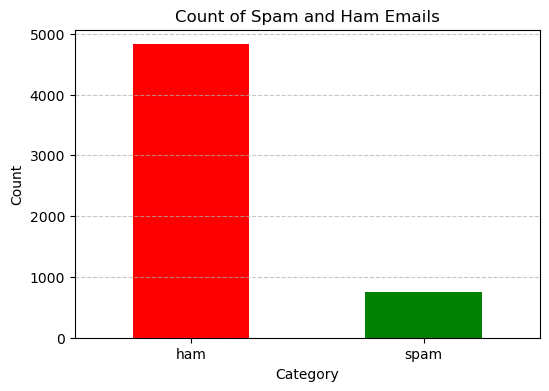

In [12]:
plt.figure(figsize=(6, 4))
count_categories.plot(kind='bar', color=['red', 'green'])
plt.title('Count of Spam and Ham Emails')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Seperation and Filter based on Massage

In [13]:
from collections import Counter
import re

In [15]:
# Seperate the spam and ham emails
spam_massage = email[email['Category'] == 'spam']['Message']
ham_massage = email[email['Category'] == 'ham']['Message']

## function to clean text and get words
def get_words(text_series):
    all_words = []
    for text in text_series:
        words = re.findall(r'\b\w+\b', text.lower())
        all_words.extend(words)
    return all_words

### Get text from ham emails
ham_text = get_words(ham_massage)
### get most common words in ham emails
common_ham_words = Counter(ham_text).most_common(10)

### Get text from spam emails
spam_text = get_words(spam_massage)
### get most common words in spam emails
common_spam_words = Counter(spam_text).most_common(10)

print("\nMost common words in ham emails:")
for word, count in common_ham_words:
    print(f"{word}: {count}")

print("\nMost common words in spam emails:")
for word, count in common_spam_words:
    print(f"{word}: {count}")


Most common words in ham emails:
i: 2960
you: 1948
to: 1562
the: 1133
a: 1070
u: 1033
and: 858
in: 823
me: 777
my: 754

Most common words in spam emails:
to: 688
a: 380
call: 352
you: 297
your: 264
free: 224
2: 207
for: 204
the: 203
now: 199


#### Visualization

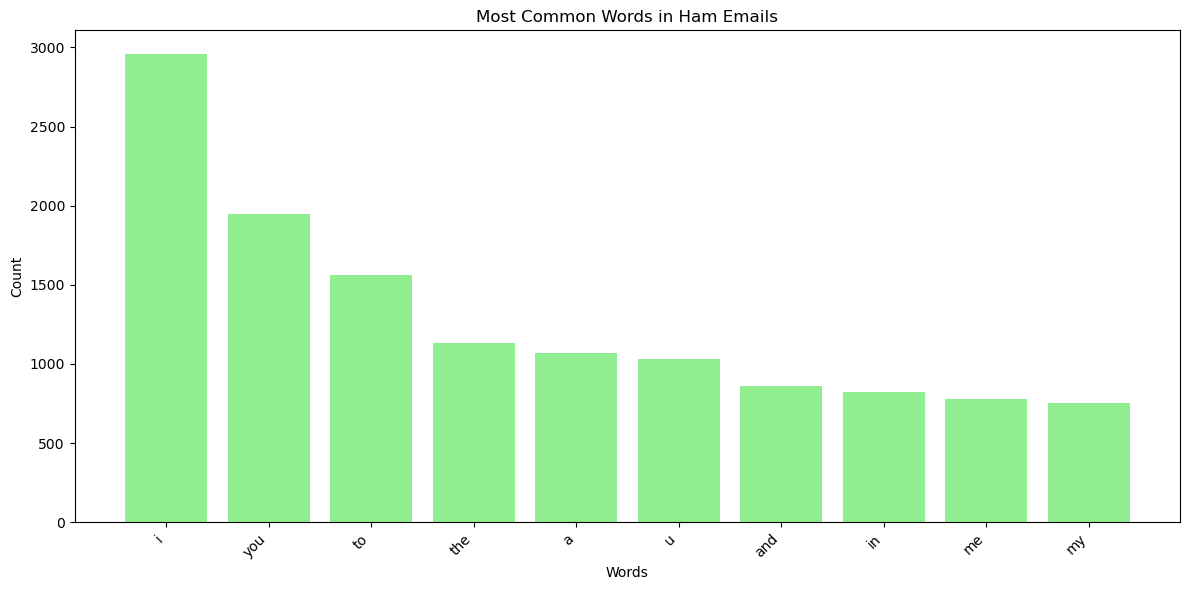

In [17]:
plt.figure(figsize=(12, 6))
words, counts = zip(*common_ham_words[:10]) 
plt.bar(words, counts, color='lightgreen')
plt.title('Most Common Words in Ham Emails')
plt.xlabel('Words')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

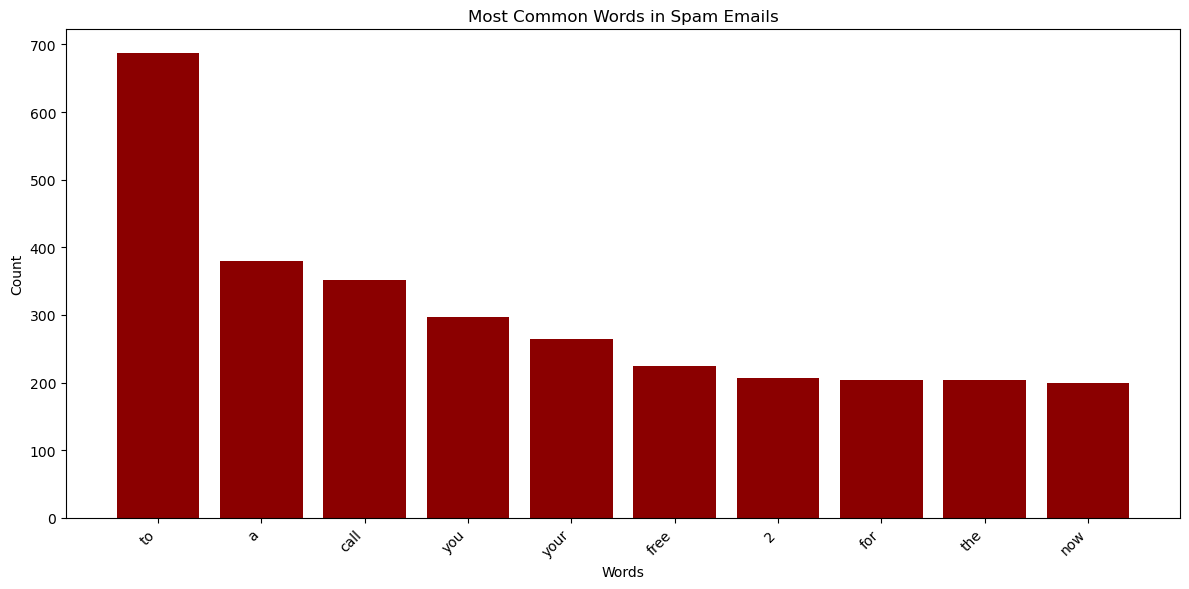

In [18]:
plt.figure(figsize=(12, 6))
word, counts = zip(*common_spam_words[:10])
plt.bar(word, counts, color='darkred')
plt.title('Most Common Words in Spam Emails')
plt.xlabel('Words')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()